In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [55]:
data = pd.read_csv("/content/Salary Data.csv")

In [56]:
data.shape

(375, 6)

In [57]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [59]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [60]:
data['Job Title']

,Job Title
0,Software Engineer
1,Data Analyst
2,Senior Manager
3,Sales Associate
4,Director
...,...
370,Senior Marketing Analyst
371,Director of Operations
372,Junior Project Manager
373,Senior Operations Coordinator


In [61]:
data.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [62]:
#Categorical values(object to int)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

object_list = list(data.select_dtypes(include=['object']).columns)
for i in object_list:
    data[i] = le.fit_transform(data[i])


In [63]:
data.isnull().sum()

,0
Age,2
Gender,0
Education Level,0
Job Title,0
Years of Experience,2
Salary,2


In [64]:
#Outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

    # Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [65]:
data.isnull().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


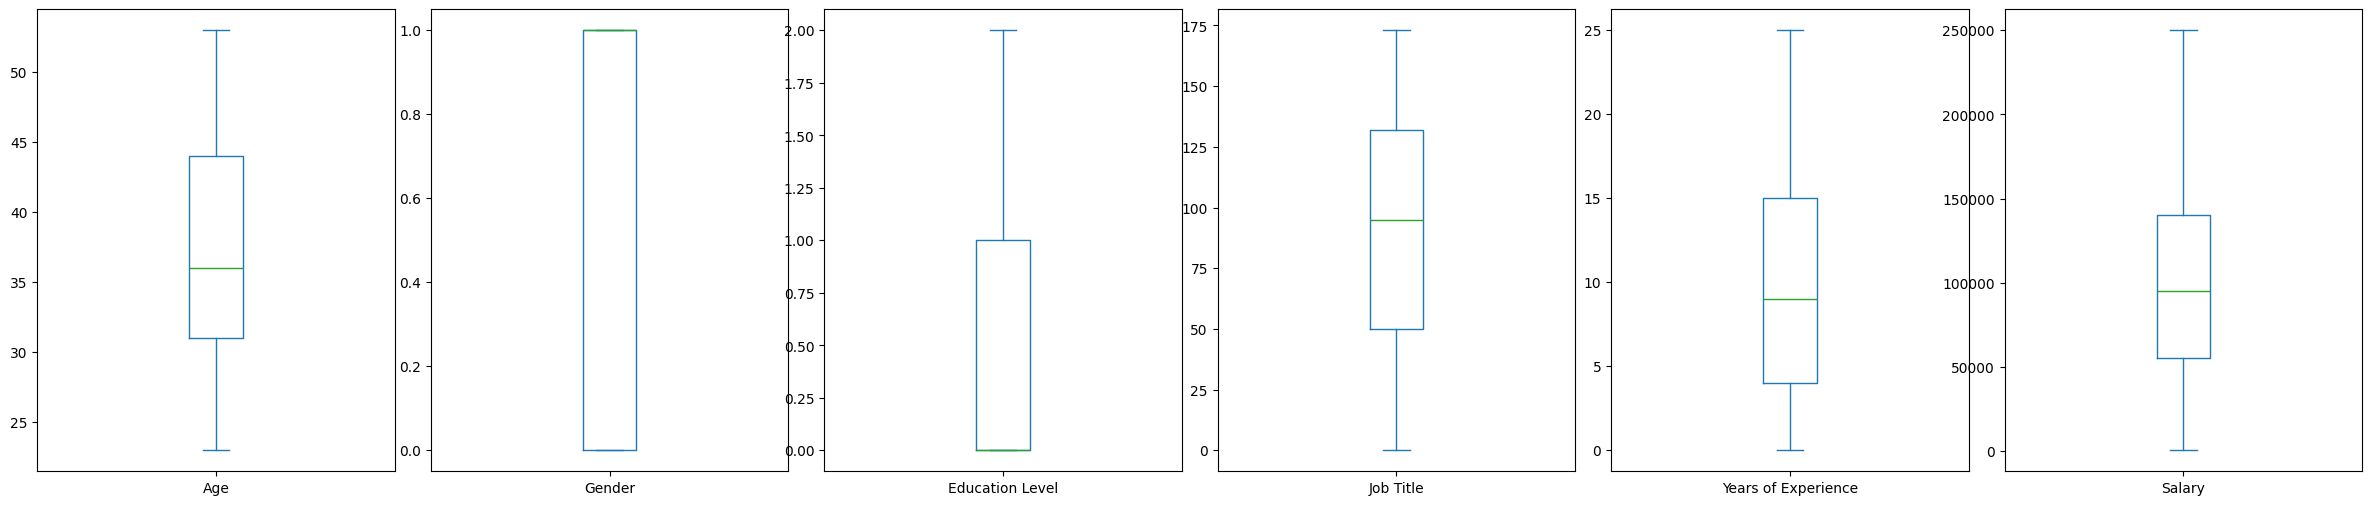

In [66]:
#outlier
import matplotlib.pyplot as plt
data.plot(kind='box', subplots=True,
    sharey=False,
    figsize=(30, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.1)
plt.show()

In [67]:
data.shape

(373, 6)

In [68]:
data.head(1)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0


In [69]:
#dataset split
x=data.iloc[:,:5]

y=data.iloc[:,5]
print(x)
print(y)

      Age  Gender  Education Level  Job Title  Years of Experience
0    32.0       1                0        159                  5.0
1    28.0       0                1         17                  3.0
2    45.0       1                2        130                 15.0
3    36.0       0                0        101                  7.0
4    52.0       1                1         22                 20.0
..    ...     ...              ...        ...                  ...
370  35.0       0                0        131                  8.0
371  43.0       1                1         30                 19.0
372  29.0       0                0         70                  2.0
373  34.0       1                0        137                  7.0
374  44.0       0                2        110                 15.0

[373 rows x 5 columns]
0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    15000

In [70]:
#dataset split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Model building
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


model= DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [71]:
y_pred = model.predict(X_test)

In [72]:
# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("Performance Metrics for Decision Tree Regressor:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Performance Metrics for Decision Tree Regressor:
Mean Absolute Error (MAE): 11336.16
Mean Squared Error (MSE): 280585915.18
Root Mean Squared Error (RMSE): 16750.70
R-squared (R²): 0.88


In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("Performance Metrics for LinearRegression:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")



Performance Metrics for LinearRegression:
Mean Absolute Error (MAE): 11377.18
Mean Squared Error (MSE): 252493731.92
Root Mean Squared Error (RMSE): 15890.05
R-squared (R²): 0.89


In [74]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("Performance Metrics for RandomForestRegressor:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")



Performance Metrics for RandomForestRegressor:
Mean Absolute Error (MAE): 9910.71
Mean Squared Error (MSE): 189687321.43
Root Mean Squared Error (RMSE): 13772.70
R-squared (R²): 0.92


In [75]:
import joblib

joblib.dump(model, 'Employee_model.pkl')

['Employee_model.pkl']

In [76]:
X_train.shape[1]

5

In [83]:
data.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0


In [84]:
1
# Load the pre-trained model
model = joblib.load('Employee_model.pkl')

# Collect input dynamically
loan_list = []
for name in X_train.columns:  # Assuming you have the correct feature names in X_train
    value = input(f"Enter {name}: ")
    loan_list.append(float(value))  # Convert input to float if they are numerical features

# Reshape the input to 2D (required format for prediction)
loan_array = [loan_list]  # Wrapping it in another list to create 2D array-like structure

# Predictid
pred = model.predict(loan_array)
print(f"Prediction: {pred}")


Enter Age: 45.0
Enter Gender: 1
Enter Education Level: 2
Enter Job Title: 130
Enter Years of Experience: 15.0
Prediction: [149900.]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
